In [45]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 22, 10

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [29]:
data = pd.read_csv('data/us-data.csv', thousands=',')
data

,Date,States,Positive,Negative,Pending,Hospitalized – Currently,Hospitalized – Cumulative,In ICU – Currently,In ICU – Cumulative,On Ventilator – Currently,On Ventilator – Cumulative,Recovered,Deaths
0,20200725,56,4158341,46477342,3377.0,59227.0,291347.0,10380.0,13279.0,2729.0,1300.0,1279414.0,138692.0
1,20200724,56,4092928,45745166,3409.0,59670.0,289355.0,10405.0,13182.0,2712.0,1297.0,1261624.0,137655.0
2,20200723,56,4017735,44890521,3179.0,59885.0,286329.0,10418.0,12933.0,2472.0,1280.0,1233269.0,136477.0
3,20200722,56,3946708,44137149,3051.0,59675.0,283829.0,10457.0,12790.0,2440.0,1258.0,1210849.0,135438.0
4,20200721,56,3877558,43410797,3197.0,59362.0,281581.0,6711.0,12629.0,2414.0,1242.0,1182931.0,134321.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,20200126,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
182,20200125,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,20200124,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
184,20200123,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.columns

Index(['Date', 'States', 'Positive', 'Negative', 'Pending',
       'Hospitalized – Currently', 'Hospitalized – Cumulative',
       'In ICU – Currently', 'In ICU – Cumulative',
       'On Ventilator – Currently', 'On Ventilator – Cumulative', 'Recovered',
       'Deaths'],
      dtype='object')

In [30]:
data_cases = data[['Date','Positive']]
data_deaths = data[['Date', 'Positive', 'Hospitalized – Cumulative','In ICU – Cumulative','On Ventilator – Cumulative', 'Deaths']]
data_deaths

,Date,Positive,Hospitalized – Cumulative,In ICU – Cumulative,On Ventilator – Cumulative,Deaths
0,20200725,4158341,291347.0,13279.0,1300.0,138692.0
1,20200724,4092928,289355.0,13182.0,1297.0,137655.0
2,20200723,4017735,286329.0,12933.0,1280.0,136477.0
3,20200722,3946708,283829.0,12790.0,1258.0,135438.0
4,20200721,3877558,281581.0,12629.0,1242.0,134321.0
...,...,...,...,...,...,...
181,20200126,2,NaN,NaN,NaN,NaN
182,20200125,2,NaN,NaN,NaN,NaN
183,20200124,2,NaN,NaN,NaN,NaN
184,20200123,2,NaN,NaN,NaN,NaN


In [31]:
data_deaths['Date'] = pd.to_datetime(data_deaths['Date'].astype(str), format='%Y%m%d')
data_deaths = data_deaths.sort_values(by=['Date'], ascending=True)
data_deaths

,Date,Positive,Hospitalized – Cumulative,In ICU – Cumulative,On Ventilator – Cumulative,Deaths
185,2020-01-22,2,NaN,NaN,NaN,NaN
184,2020-01-23,2,NaN,NaN,NaN,NaN
183,2020-01-24,2,NaN,NaN,NaN,NaN
182,2020-01-25,2,NaN,NaN,NaN,NaN
181,2020-01-26,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
4,2020-07-21,3877558,281581.0,12629.0,1242.0,134321.0
3,2020-07-22,3946708,283829.0,12790.0,1258.0,135438.0
2,2020-07-23,4017735,286329.0,12933.0,1280.0,136477.0
1,2020-07-24,4092928,289355.0,13182.0,1297.0,137655.0


In [32]:
# Convert the date column to datetime
data_deaths['Date'] = pd.to_datetime(data_deaths['Date'])

# Set the index of the DataFrame to the date column
data_deaths.set_index('Date', inplace = True)
data_deaths.sort_index(ascending=True)

# Print DataFrame summary
data_deaths.info()

# Print DataFrame
data_deaths

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 186 entries, 2020-01-22 to 2020-07-25
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Positive                    186 non-null    int64  
 1   Hospitalized – Cumulative   144 non-null    float64
 2   In ICU – Cumulative         123 non-null    float64
 3   On Ventilator – Cumulative  116 non-null    float64
 4   Deaths                      151 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 8.7 KB


,Positive,Hospitalized – Cumulative,In ICU – Cumulative,On Ventilator – Cumulative,Deaths
Date,,,,,
2020-01-22,2,NaN,NaN,NaN,NaN
2020-01-23,2,NaN,NaN,NaN,NaN
2020-01-24,2,NaN,NaN,NaN,NaN
2020-01-25,2,NaN,NaN,NaN,NaN
2020-01-26,2,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2020-07-21,3877558,281581.0,12629.0,1242.0,134321.0
2020-07-22,3946708,283829.0,12790.0,1258.0,135438.0
2020-07-23,4017735,286329.0,12933.0,1280.0,136477.0


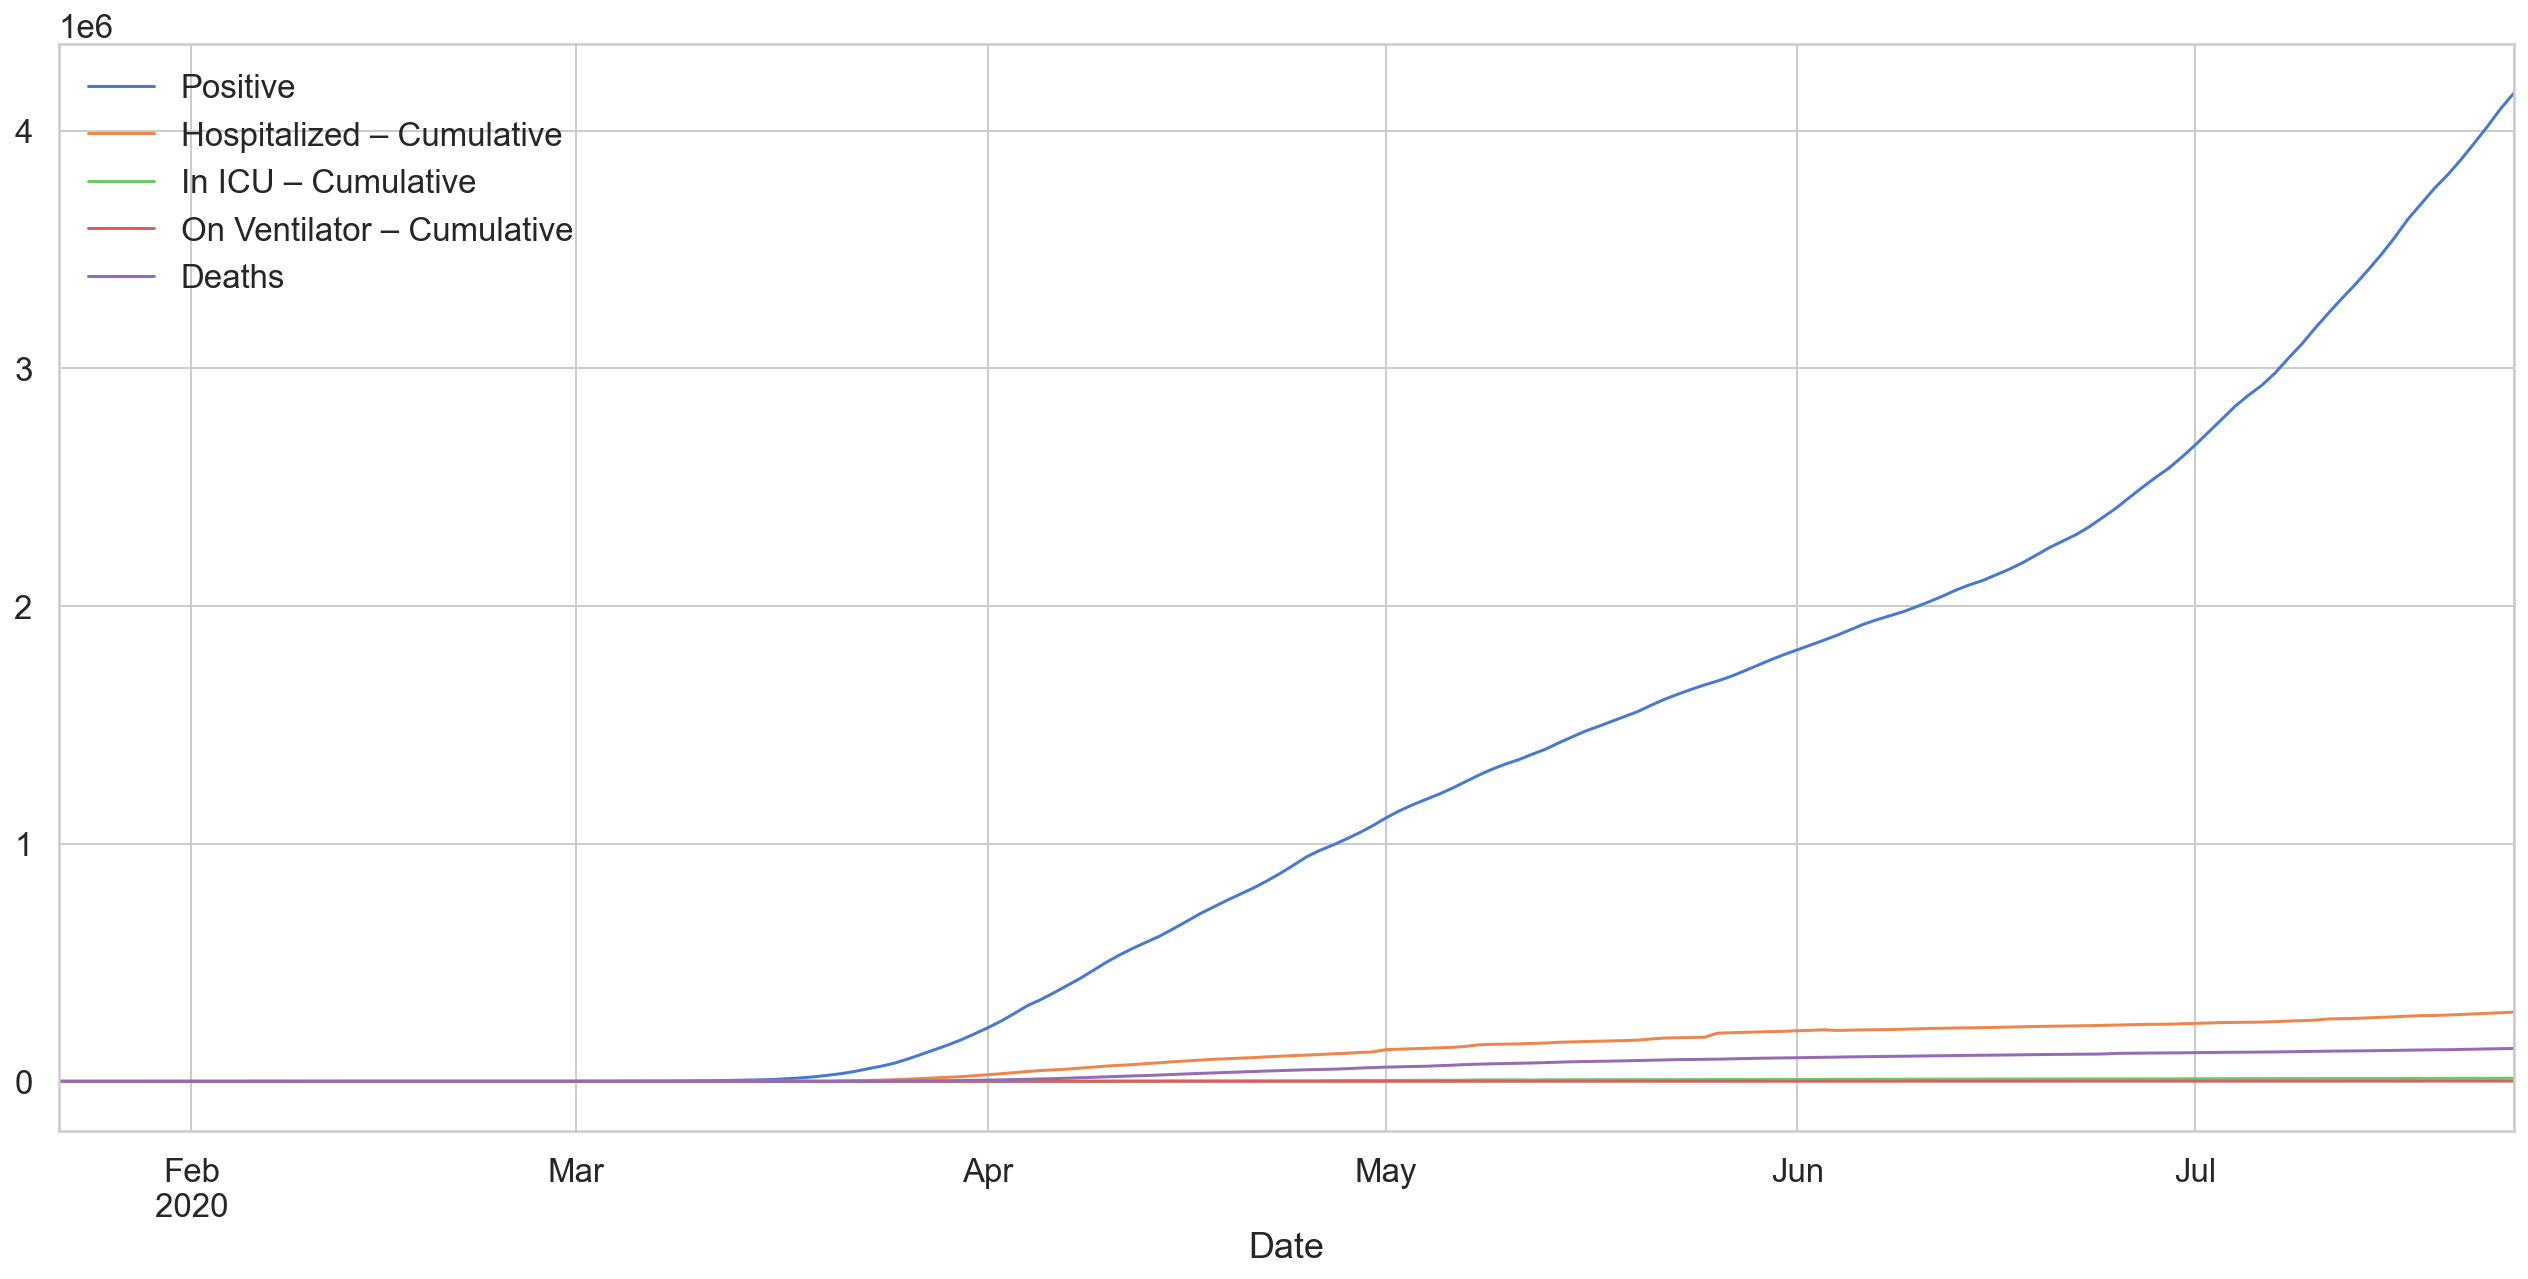

In [46]:
# Plot the series
data_deaths.plot()

In [36]:
data_deaths.fillna(0, inplace=True)
data_deaths

,Positive,Hospitalized – Cumulative,In ICU – Cumulative,On Ventilator – Cumulative,Deaths
Date,,,,,
2020-01-22,2,0.0,0.0,0.0,0.0
2020-01-23,2,0.0,0.0,0.0,0.0
2020-01-24,2,0.0,0.0,0.0,0.0
2020-01-25,2,0.0,0.0,0.0,0.0
2020-01-26,2,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2020-07-21,3877558,281581.0,12629.0,1242.0,134321.0
2020-07-22,3946708,283829.0,12790.0,1258.0,135438.0
2020-07-23,4017735,286329.0,12933.0,1280.0,136477.0


In [44]:
train_size = int(len(data_deaths) * 0.9)
test_size = len(data_deaths) - train_size

train, test = data_deaths[0:train_size], data_deaths[train_size:len(data_deaths)]
print(len(train), len(test))

167 19


In [48]:
from sklearn.preprocessing import RobustScaler

f_columns = ['Positive', 'Hospitalized – Cumulative','In ICU – Cumulative','On Ventilator – Cumulative']

f_transformer = RobustScaler()
cnt_transformer = RobustScaler()

f_transformer = f_transformer.fit(train[f_columns].to_numpy())
cnt_transformer = cnt_transformer.fit(train[['Deaths']])

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())
train['Deaths'] = cnt_transformer.transform(train[['Deaths']])

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())
test['Deaths'] = cnt_transformer.transform(test[['Deaths']])

In [50]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

In [103]:
time_steps = 10

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.Deaths, time_steps)
X_test, y_test = create_dataset(test, test.Deaths, time_steps)

print(X_train.shape, y_train.shape)

(157, 10, 5) (157,)


In [104]:
model = keras.Sequential()
model.add(
  keras.layers.Bidirectional(
    keras.layers.LSTM(
      units=128, 
      input_shape=(X_train.shape[1], X_train.shape[2])
    )
  )
)
model.add(keras.layers.Dropout(rate=0.2))
model.add(keras.layers.Dense(units=1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [111]:
history = model.fit(
    X_train, y_train, 
    epochs=100, 
    batch_size=32, 
    validation_split=0.1,
    shuffle=False
)

Epoch 1/100
5/5 [==============================] - 1s 280ms/step - loss: 8.6033e-04 - val_loss: 0.0029
Epoch 2/100
5/5 [==============================] - 0s 26ms/step - loss: 0.0013 - val_loss: 0.0025
Epoch 3/100
5/5 [==============================] - 0s 29ms/step - loss: 7.2409e-04 - val_loss: 3.1103e-04
Epoch 4/100
5/5 [==============================] - 0s 29ms/step - loss: 4.5785e-04 - val_loss: 2.6463e-04
Epoch 5/100
5/5 [==============================] - 0s 31ms/step - loss: 5.7025e-04 - val_loss: 2.5860e-04
Epoch 6/100
5/5 [==============================] - 0s 37ms/step - loss: 4.8059e-04 - val_loss: 9.9628e-05
Epoch 7/100
5/5 [==============================] - 0s 34ms/step - loss: 3.7525e-04 - val_loss: 3.0811e-04
Epoch 8/100
5/5 [==============================] - 0s 35ms/step - loss: 3.7228e-04 - val_loss: 2.5704e-04
Epoch 9/100
5/5 [==============================] - 0s 31ms/step - loss: 4.1495e-04 - val_loss: 2.0057e-04
Epoch 10/100
5/5 [==============================] - 0s 35

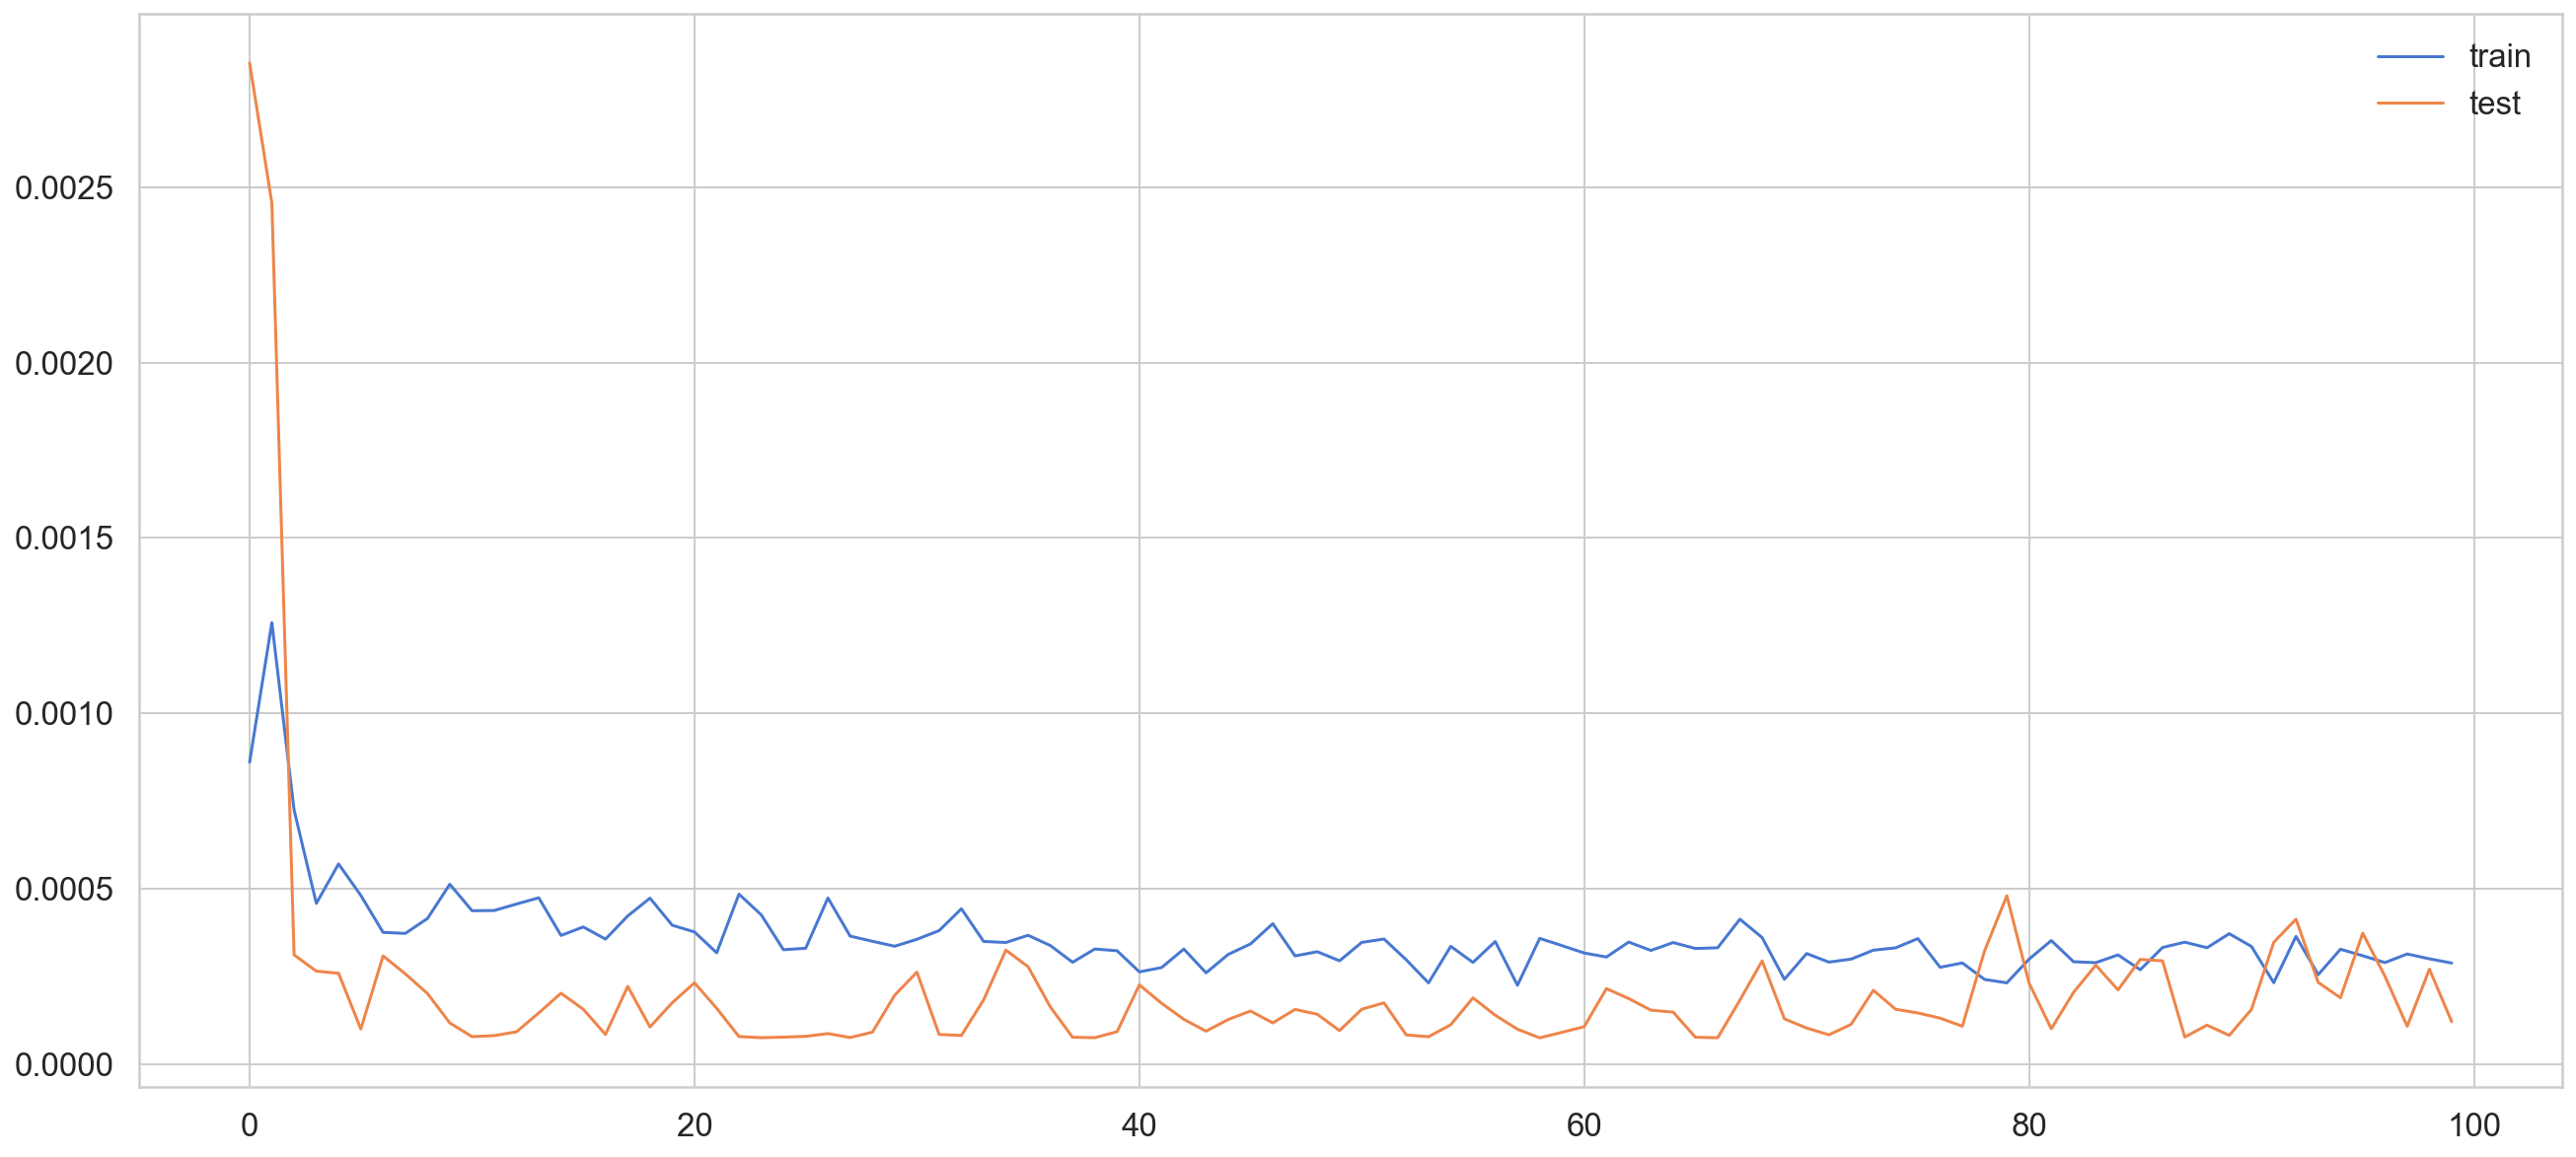

In [112]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [113]:
y_pred = model.predict(X_test)

In [114]:
y_train_inv = cnt_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = cnt_transformer.inverse_transform(y_test.reshape(1, -1))
y_pred_inv = cnt_transformer.inverse_transform(y_pred)
print(y_pred_inv.reshape(1, -1) - y_test_inv)
print(y_test_inv)

[[ 752.671875  901.59375  1273.875    1714.96875  1475.640625 1147.28125
   950.15625   697.140625  631.0625  ]]
[[131523. 132395. 132921. 133283. 134321. 135438. 136477. 137655. 138692.]]


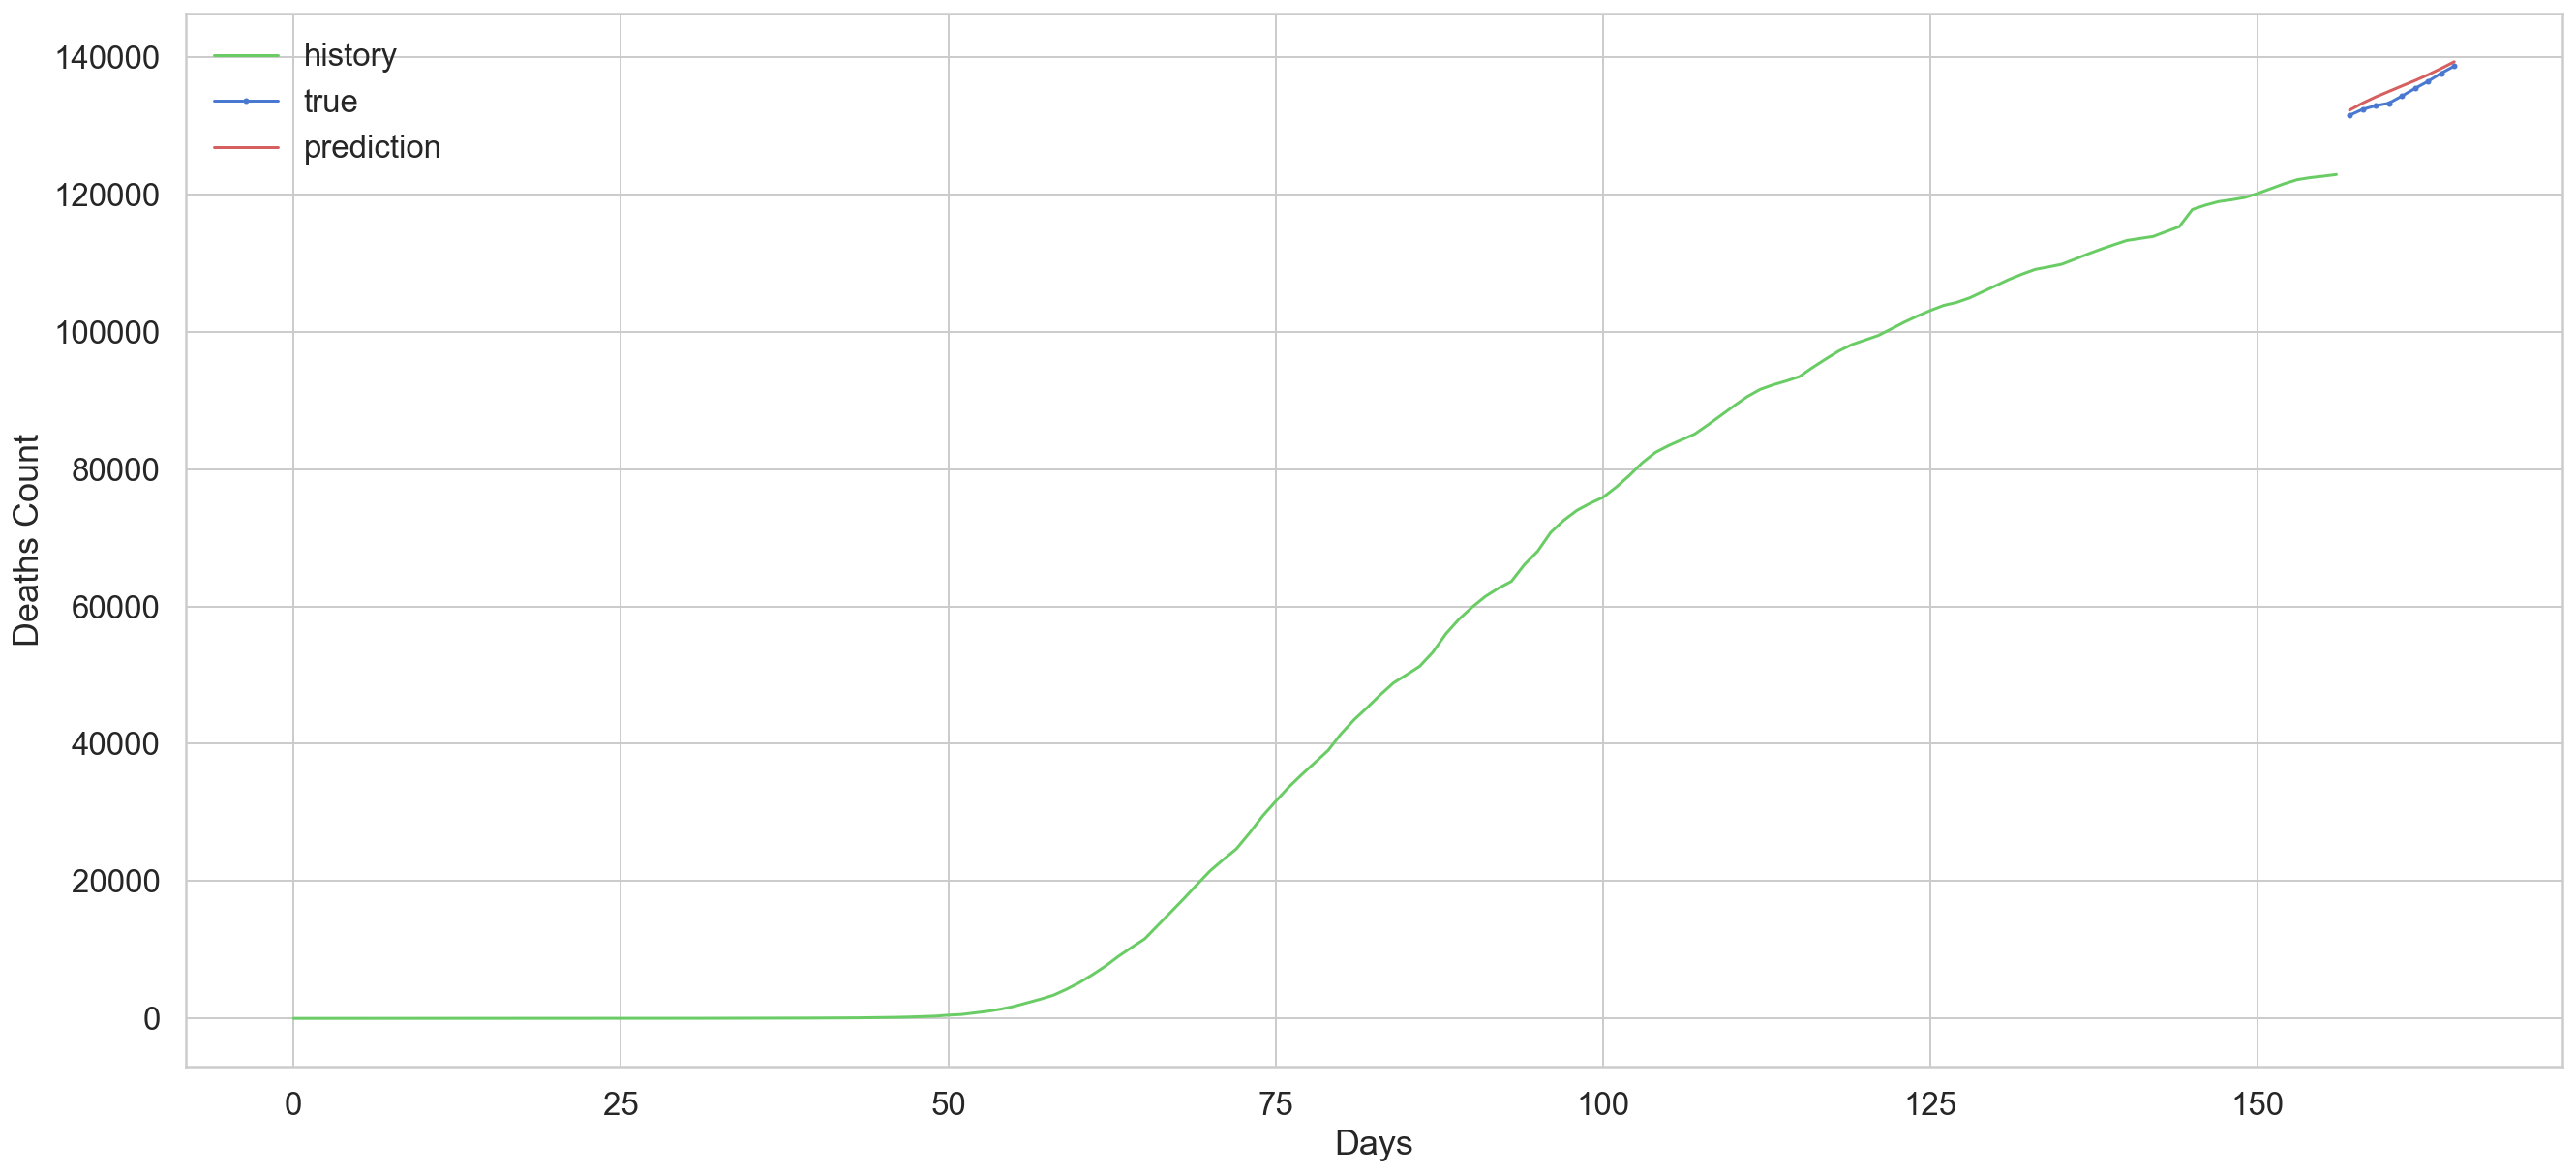

In [115]:
plt.plot(np.arange(0, len(y_train)), y_train_inv.flatten(), 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_inv.flatten(), marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Deaths Count')
plt.xlabel('Days')
plt.legend()
plt.show();

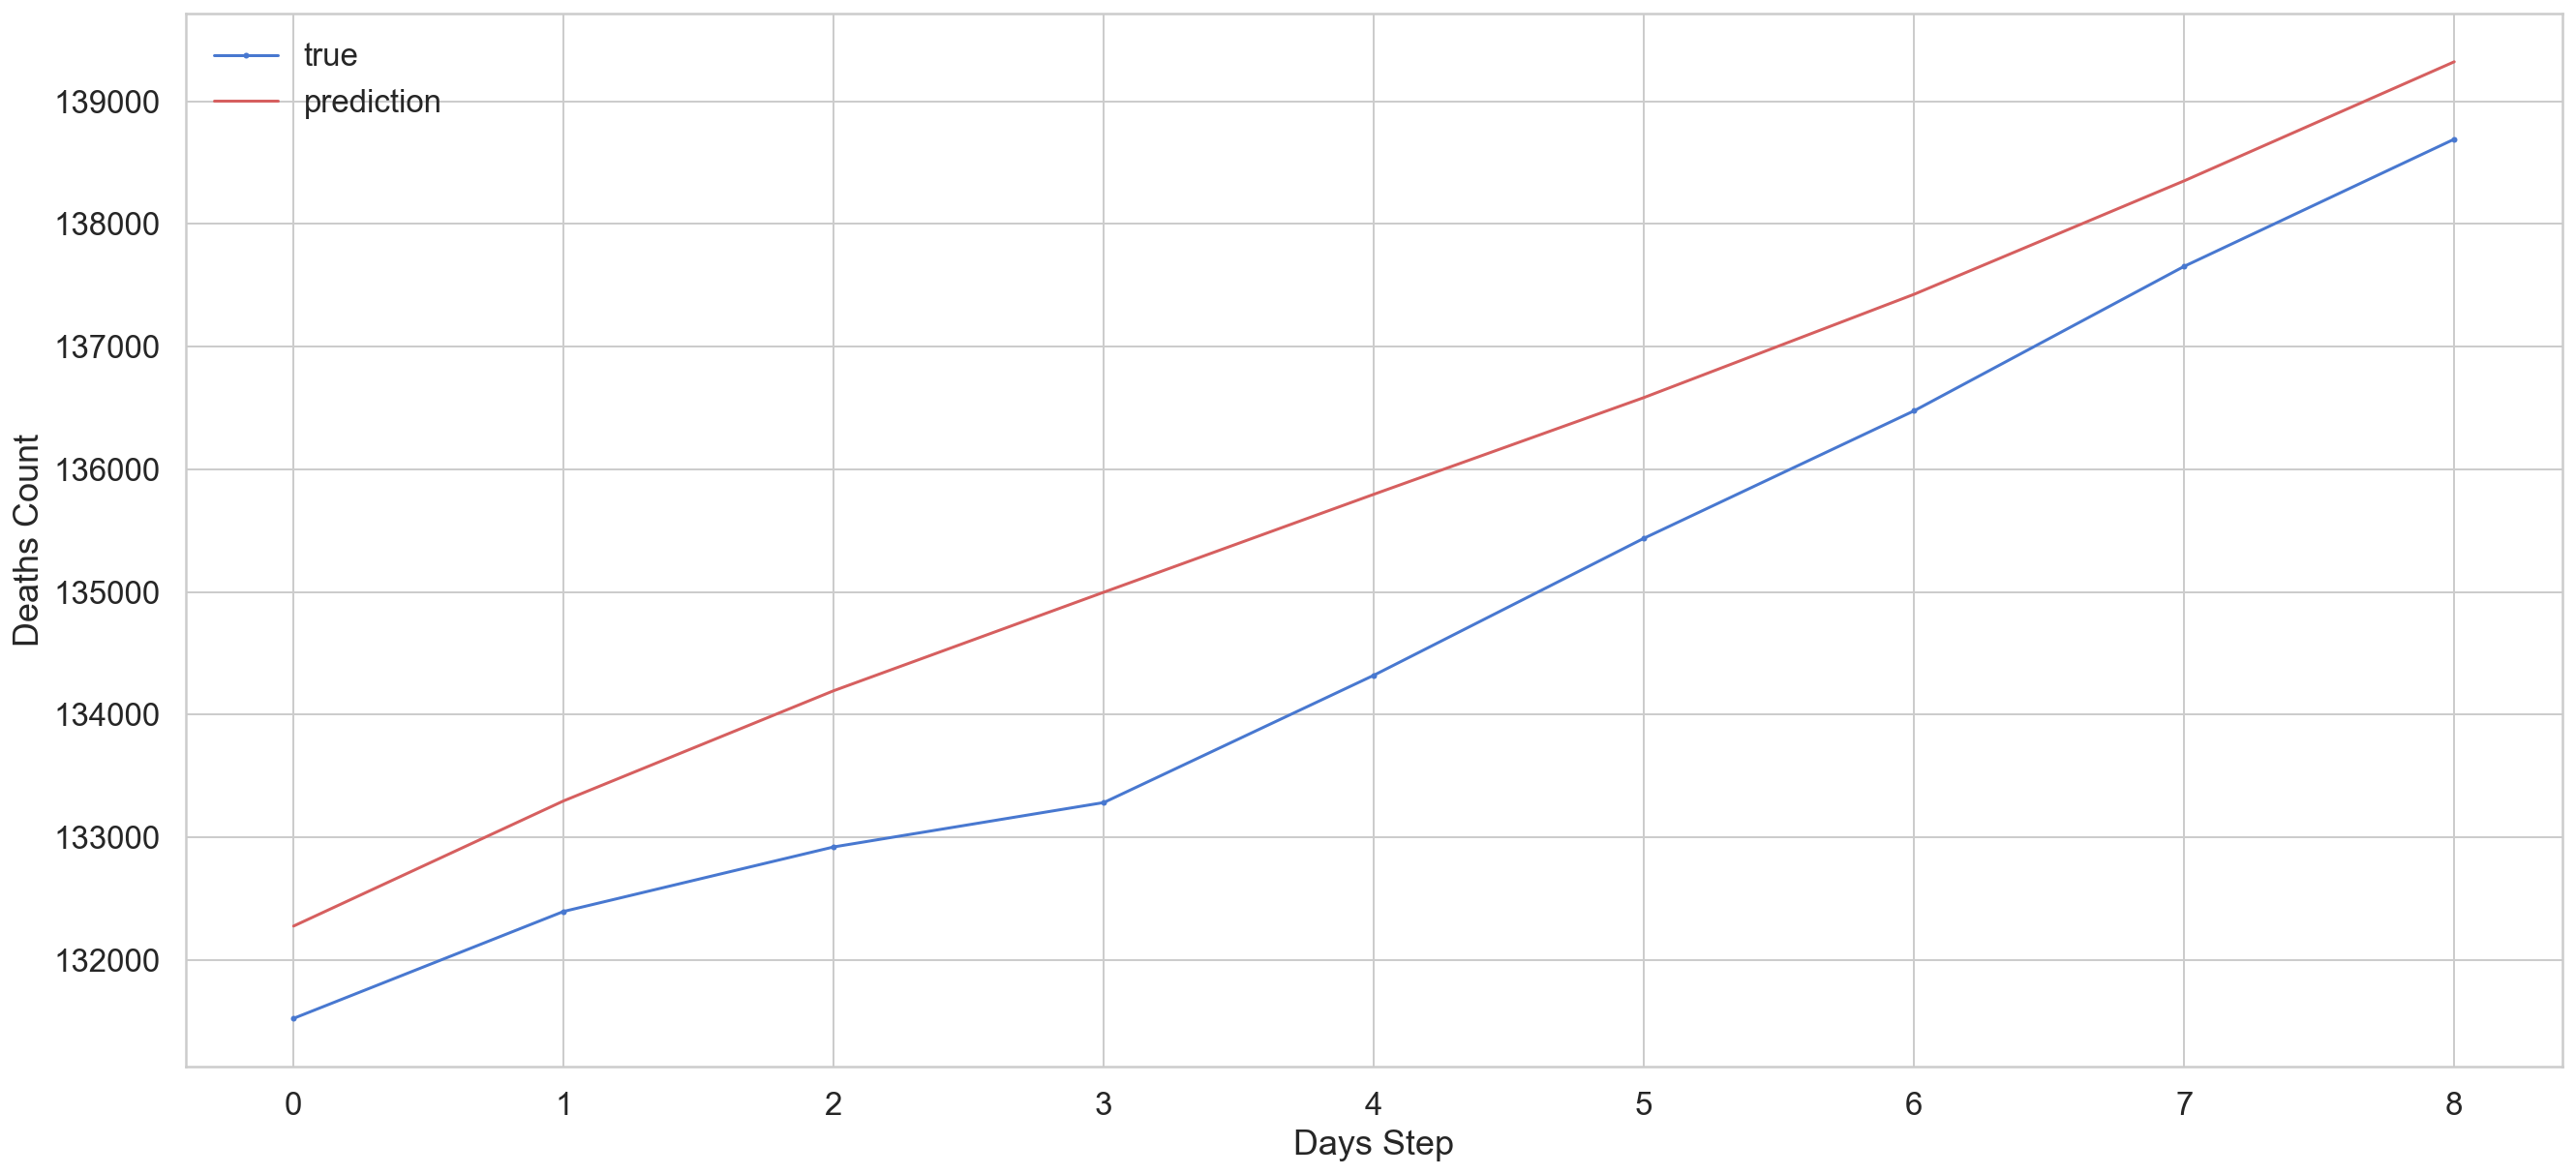

In [116]:
plt.plot(y_test_inv.flatten(), marker='.', label="true")
plt.plot(y_pred_inv.flatten(), 'r', label="prediction")
plt.ylabel('Deaths Count')
plt.xlabel('Days Step')
plt.legend()
plt.show();

In [121]:
# calculate RMSE
from math import sqrt
rmse = sqrt(mean_squared_error(y_test_inv, y_pred_inv.reshape(1, -1)))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1116.745
